In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('df_tratado.csv', sep=',')
df.head()

,Unnamed: 0,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,dia,mes,ano,grave
0,2,1032898.0,2007-08-13,Segunda,14:25:00,MG,40,585.5,ITABIRITO,Outras,...,0,1,2,0,1,1,13,8,2007,0
1,3,1051130.0,2007-02-12,Segunda,02:10:00,MA,135,11.0,SAO LUIS,Animais na Pista,...,2,1,0,0,3,1,12,2,2007,1
2,4,1066824.0,2007-11-20,terça,05:30:00,CE,222,30.8,CAUCAIA,Defeito mecânico em veículo,...,1,0,0,0,1,1,20,11,2007,0
3,5,1069918.0,2007-12-16,Domingo,17:40:00,MA,230,14.0,BARAO DE GRAJAU,Outras,...,0,1,0,0,1,1,16,12,2007,0
4,6,1070971.0,2007-03-05,Segunda,08:10:00,PR,277,584.4,CASCAVEL,Outras,...,0,0,2,0,0,2,5,3,2007,0


In [9]:
features = ['dia_semana','br','km','fase_dia','sentido_via','condicao_metereologica','tipo_pista','pessoas','feridos_leves','feridos_graves','ilesos','veiculos','dia','mes']
X = df[features]
y = df['grave']

In [10]:
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

C:\Users\adria\AppData\Local\Temp\ipykernel_1864\1733159600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\adria\AppData\Local\Temp\ipykernel_1864\1733159600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\adria\AppData\Local\Temp\ipykernel_1864\1733159600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [11]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Criar e treinar o modelo
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

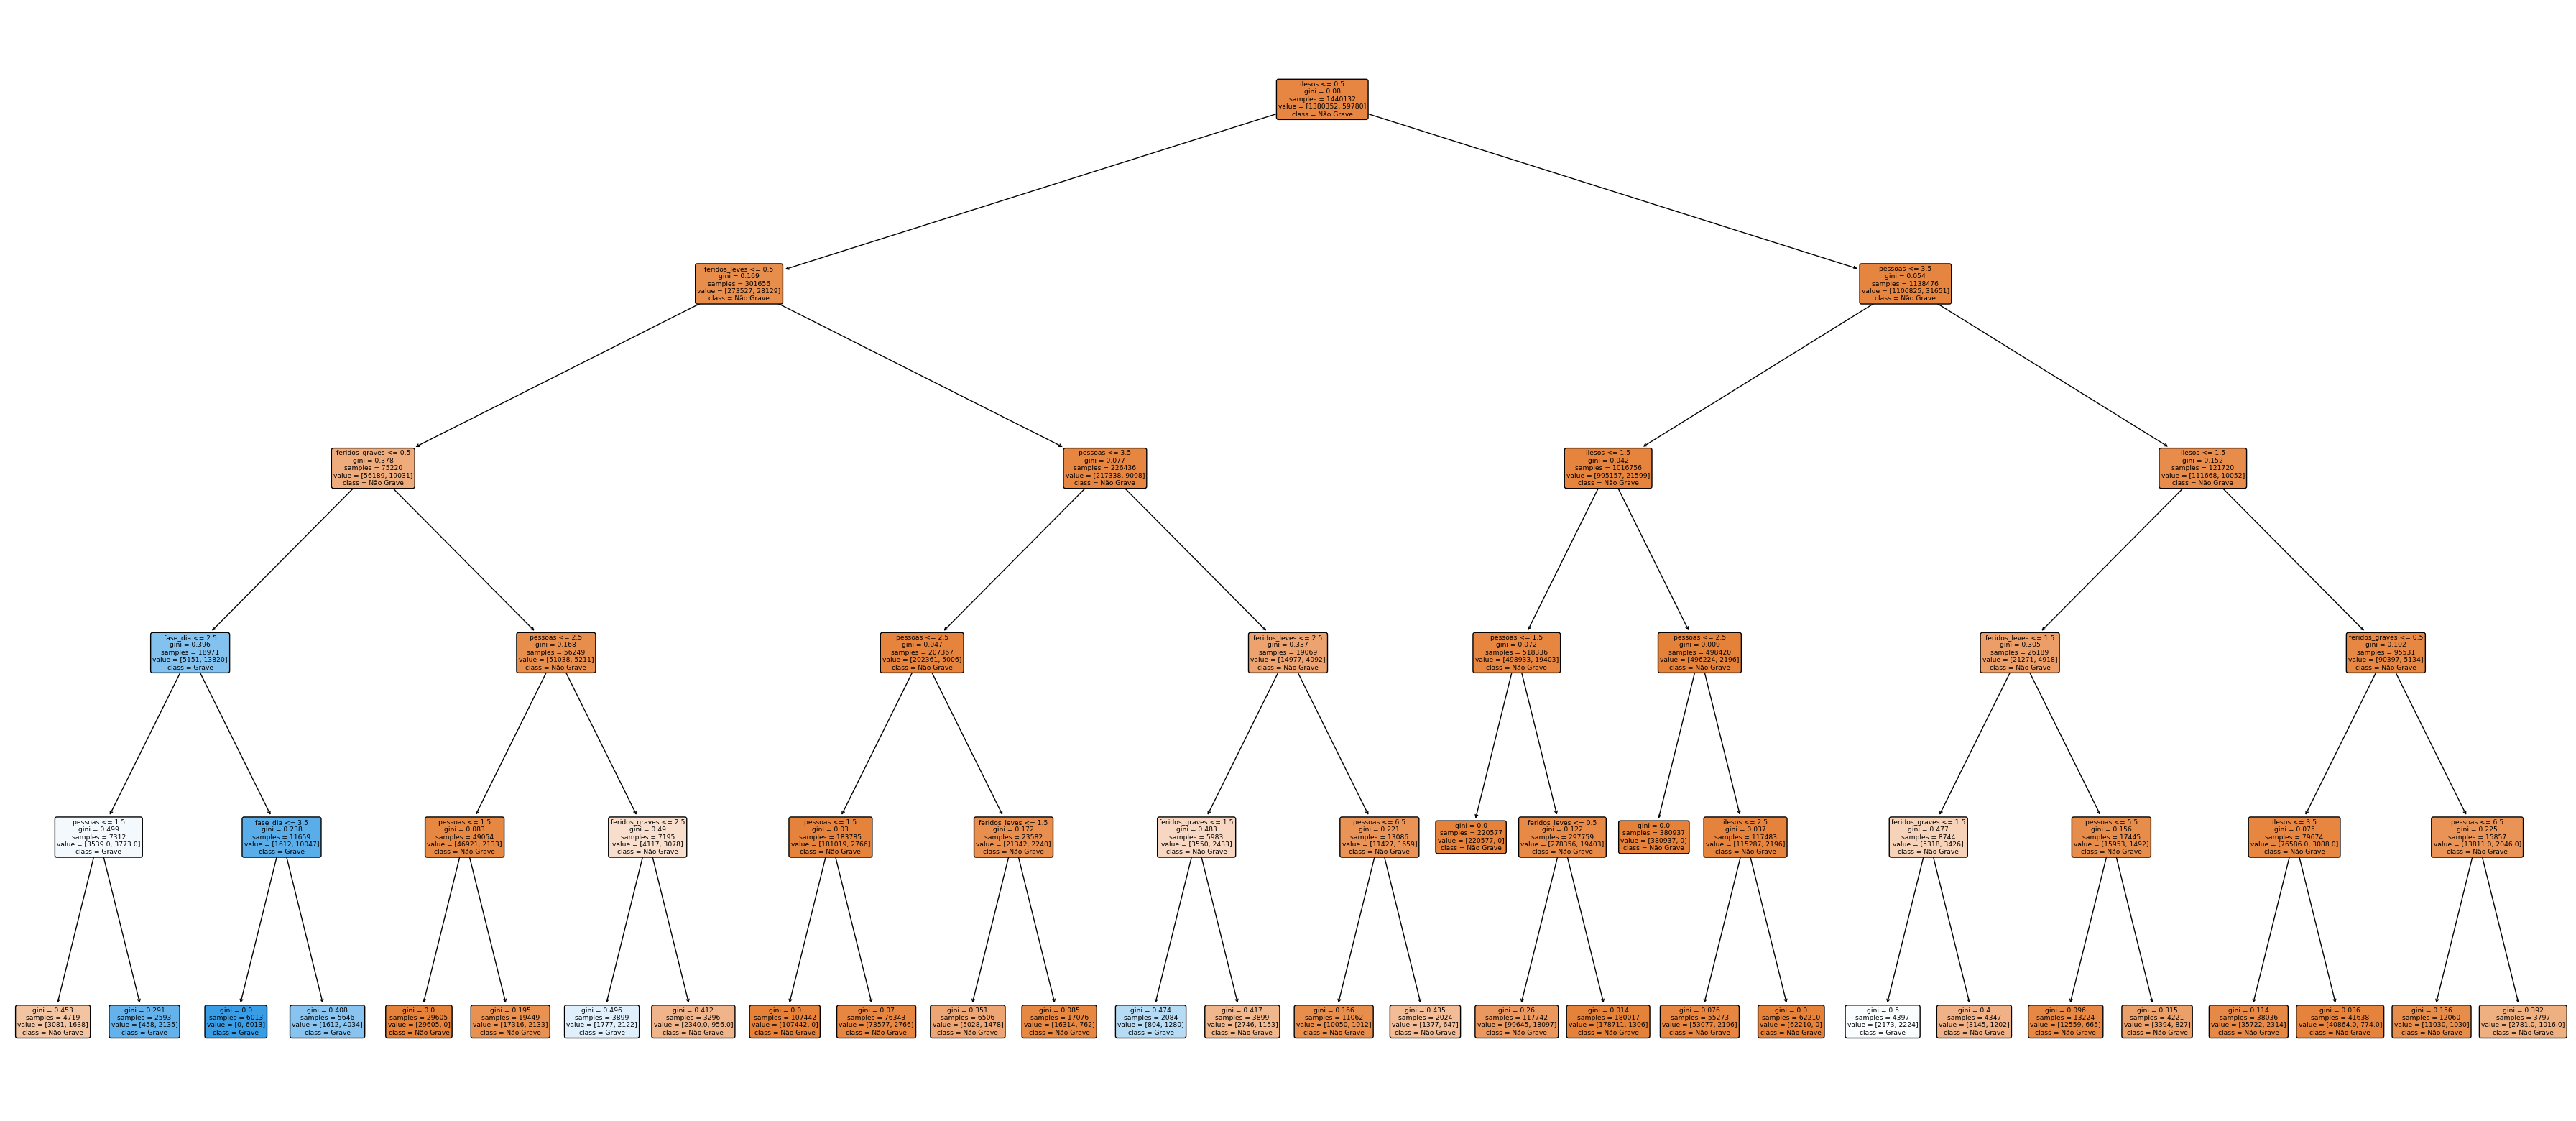

In [13]:
# Visualização gráfica da árvore
plt.figure(figsize=(46, 20))
plot_tree(clf, feature_names=features, class_names=['Não Grave', 'Grave'], filled=True, rounded=True)
plt.show()

In [14]:
# Exibir regras da árvore em texto
tree_rules = export_text(clf, feature_names=features)
print("\n📜 Regras da Árvore de Decisão:\n")
print(tree_rules)


📜 Regras da Árvore de Decisão:

|--- ilesos <= 0.50
|   |--- feridos_leves <= 0.50
|   |   |--- feridos_graves <= 0.50
|   |   |   |--- fase_dia <= 2.50
|   |   |   |   |--- pessoas <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- pessoas >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- fase_dia >  2.50
|   |   |   |   |--- fase_dia <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fase_dia >  3.50
|   |   |   |   |   |--- class: 1
|   |   |--- feridos_graves >  0.50
|   |   |   |--- pessoas <= 2.50
|   |   |   |   |--- pessoas <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- pessoas >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- pessoas >  2.50
|   |   |   |   |--- feridos_graves <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feridos_graves >  2.50
|   |   |   |   |   |--- class: 0
|   |--- feridos_leves >  0.50
|   |   |--- pessoas <= 3.50
|   |   |   |--- pessoas <= 2.50
|   |   |   |   |--- pessoas <= 1